# Some simple ERDDAP timing tests

Time how long it takes to get data via ERDDAP.  

Here we are using the IOOS NERACOOS ERDDAP service at http://www.neracoos.org/erddap.  

Lots of factors affect timing, as described at the end.  

But for these tests it's pretty darn speedy!

In [1]:
%matplotlib inline
import urllib, json
import pandas as pd

Try CSV response for 1 week of accelerometer (wave) data from NERACOOS Buoy B off Portland, ME

In [2]:
url = 'http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.csv?time,significant_wave_height&time>"now-7days"'
print(url)

http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.csv?time,significant_wave_height&time>"now-7days"


In [3]:
%%timeit
df_sb = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 

1 loop, best of 3: 67 ms per loop


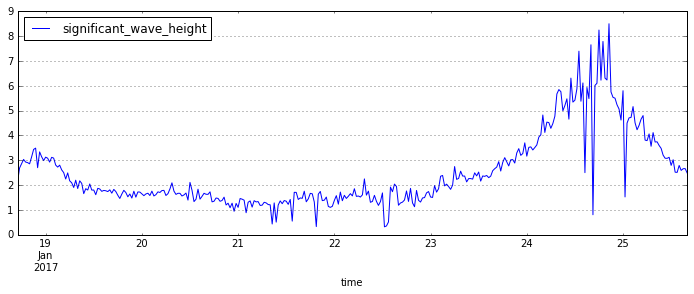

In [4]:
df_sb = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 
df_sb.plot(figsize=(12,4),grid='on');

How about 1 year of data?

In [18]:
url = 'http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.csv?time,significant_wave_height&time>"now-365days"'
print(url)

http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.csv?time,significant_wave_height&time>"now-365days"


In [19]:
%%timeit
df_sb = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 

1 loop, best of 3: 388 ms per loop


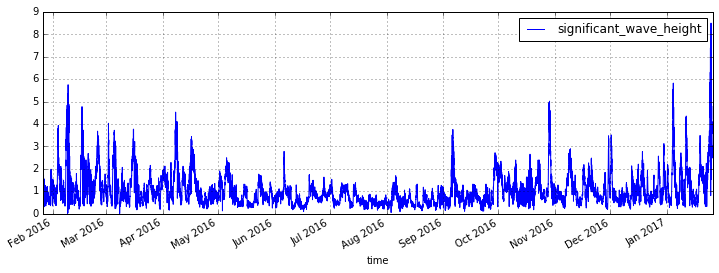

In [20]:
df_sb = pd.read_csv(url,index_col='time',parse_dates=True,skiprows=[1])  # skip the units row 
df_sb.plot(figsize=(12,4),grid='on');

Try JSON response -- might want to use this in a web app

In [8]:
url = 'http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.json?time,significant_wave_height&time>"now-7days"'
print(url)

http://www.neracoos.org/erddap/tabledap/B01_accelerometer_all.json?time,significant_wave_height&time>"now-7days"


In [9]:
%%timeit
response = urllib.urlopen(url)
data = json.loads(response.read())

10 loops, best of 3: 96.4 ms per loop


In [10]:
response = urllib.urlopen(url)
data = json.loads(response.read())

In [11]:
data

{u'table': {u'columnNames': [u'time', u'significant_wave_height'],
  u'columnTypes': [u'String', u'float'],
  u'columnUnits': [u'UTC', u'meters'],
  u'rows': [[u'2017-01-18T17:00:00Z', 2.1363115],
   [u'2017-01-18T17:30:00Z', 2.6868901],
   [u'2017-01-18T18:00:00Z', 2.86435],
   [u'2017-01-18T18:30:00Z', 3.0311515],
   [u'2017-01-18T19:00:00Z', 2.9257133],
   [u'2017-01-18T19:30:00Z', 2.902714],
   [u'2017-01-18T20:00:00Z', 2.853798],
   [u'2017-01-18T20:30:00Z', 3.1318264],
   [u'2017-01-18T21:00:00Z', 3.4343703],
   [u'2017-01-18T21:30:00Z', 3.4868062],
   [u'2017-01-18T22:00:00Z', 2.6982548],
   [u'2017-01-18T22:30:00Z', 3.3352795],
   [u'2017-01-18T23:00:00Z', 3.1377385],
   [u'2017-01-18T23:30:00Z', 2.984962],
   [u'2017-01-19T00:00:00Z', 3.1228244],
   [u'2017-01-19T00:30:00Z', 3.080198],
   [u'2017-01-19T01:00:00Z', 2.9236872],
   [u'2017-01-19T01:30:00Z', 3.1152282],
   [u'2017-01-19T02:00:00Z', 3.0849724],
   [u'2017-01-19T02:30:00Z', 2.8047462],
   [u'2017-01-19T03:00:00Z', 2

In general the time to retrieve data depends on:
* the length of the time period requested
* the sampling interval
* how the data is stored/accessed (various binary file types vs various text file types vs database vs remote data servers, vs ...)
* how the data is organized in the source files (one file per station? one file per station per month?)
* whether the HTTP header of the request includes accept-encoding ("gzip", "x-gzip", or "deflate"). Browsers automatically include this. Compression is more work but less data to be transferred, especially for text formats like .csv and .json.
* the response file type (some are streamable, some are cached, some are verbose, ...)
* The load on the server, especially the RAID/drives.
* The available bandwidth of the server's and the user's network.



Bob Simons from NOAA adds: "Some timing issues are counter-intuitive. For example, .nc files are binary so you would expect a request for a .nc file to be done very quickly. But .nc files can't be streamed. So they must be completely created on the server, then transmitted. In contrast, a .csv file can be streamed (ERDDAP reads from a file, writes a chunk to the user, reads another file, writes another chunk to the user). And although csv files are verbose, compression during transmission means that the number of bytes transmitted may actually be less than an uncompressed .nc file. So the actual results are hard to predict -- there are lots of factors."

But this is encouraging, as this suggests ERDDAP would be fast enough to acts as a backend data system to build a dashboard to status a bunch of instruments